In [1]:
pip install faraway

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing pandas
import pandas as pd

In [3]:
#importing numpy
import numpy as np

In [4]:
#importing matplotlib
import matplotlib.pyplot as plt

In [5]:
#importing seaborn
import seaborn as sns

In [6]:
#Importing the train_test_split from Sklearn to split dataset into training & testing data set
from sklearn.model_selection import train_test_split

In [7]:
#Improting Scaler to convert to Standard output
from sklearn.preprocessing import StandardScaler

In [8]:
#Importing Logistic Regression Model from sklearn
from sklearn.linear_model import LogisticRegression

In [9]:
#Importing Accuracy Score, Confusion Matrix and Classification Report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
#Importing ROC_curve and ROC_AUC_Score
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
#From faraway importing Pima, will be used to get the dataset
from faraway.datasets import pima

In [12]:
#Loading the Pima Data and assigning it to variable data
data = pima.load()

In [13]:
# Displaying the First 5 rows of Pima Data
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
#Converting the value for Diabetes column to Integer
data['diabetes'] = data['diabetes'].astype(int)

In [15]:
# Displaying the First 5 rows of Pima Data
data.head()

,pregnant,glucose,diastolic,triceps,insulin,bmi,diabetes,age,test
0,6,148,72,35,0,33.6,0,50,1
1,1,85,66,29,0,26.6,0,31,0
2,8,183,64,0,0,23.3,0,32,1
3,1,89,66,23,94,28.1,0,21,0
4,0,137,40,35,168,43.1,2,33,1


In [35]:
print("Dataset shape:", data.shape)

Dataset shape: (768, 8)


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [16]:
# Check for missing values
data.isnull().sum()

pregnant     0
glucose      0
diastolic    0
triceps      0
insulin      0
bmi          0
diabetes     0
age          0
test         0
dtype: int64

In [19]:
# Define features (X) and target (y)
X = data.drop('test', axis=1)
y = data['test']

In [20]:
# Scale Step 4 Fit the model using the training data and ensure that it learns patterns in the data.
scaler = StandardScaler()
data = scaler.fit_transform(X)

In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Instantiate the logistic regression model
model = LogisticRegression(max_iter=1000)

In [23]:
# Train the model on the training set
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [24]:
# Predict probabilities and classes
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [25]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.73


In [27]:
import sklearn.tree as tree
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Prediction using RandomForest Classifier to Gauge Accurace Score & Confusion Matrix
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print ('Accuracy Score: ', accuracy_score(y_test, pred))
print('\nConfusion Matrix\n', confusion_matrix(y_test, pred))

Accuracy Score:  0.7337662337662337

Confusion Matrix
 [[78 21]
 [20 35]]


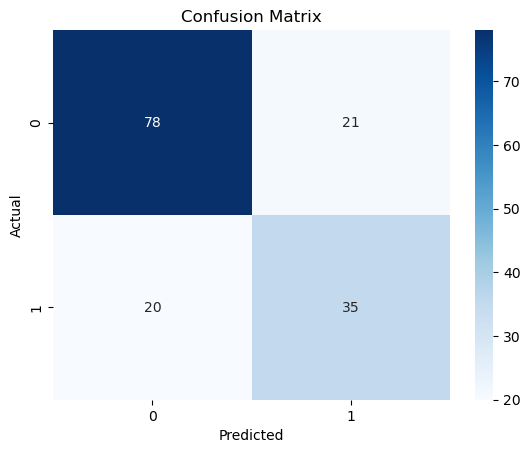

In [29]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
clf = LogisticRegression().fit(X, y)
clf.classes_

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 1])

In [31]:
y_score = clf.predict_proba(X)[:, 1]
roc_auc_score(y, y_score)

0.828231343283582

In [32]:
from sklearn.metrics import roc_curve

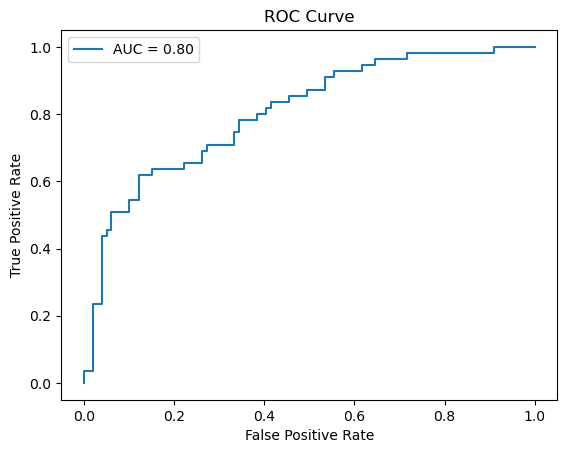

In [33]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import classification_report

In [47]:
from sklearn.metrics import classification_report

# Define custom target names for binary classification
target_names = ['Non-Diabetic', 'Diabetic']

# Print the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, target_names=target_names))


--- Classification Report ---
              precision    recall  f1-score   support

Non-Diabetic       0.80      0.79      0.79        99
    Diabetic       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

